<a href="https://colab.research.google.com/github/jihyunjeongme/deeplearning-tensflow-3min/blob/master/%5B3%EB%B6%84_%EB%94%A5%EB%9F%AC%EB%8B%9D%5D_8%EC%9E%A5_%EB%8C%80%ED%91%9C%EC%A0%81_%EB%B9%84%EC%A7%80%EB%8F%84_%ED%95%99%EC%8A%B5%EB%B2%95_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 8.1 오토인코더 개념

---

- 입력값과 출력값을 같게 하는 신경망
- 가운데 계층의 노드 수가 입력값보다 적은 것이 독특한 점
- 입력데이터를 압축하는 효과를 얻게 되고, 이 과정이 노이즈 제거에 매우 효과적이라고 알려져 있음.

#핵심
- 입력층으로 들어온 데이터를 인코더를 통해 은닉층으로 내보내고, 은닉층의 데이터를 디코더를 통해 출력층으로 내보낸 뒤, 만들어진 출력값을 입력값과 비슷해지도록 만드는 가중치를 찾아내는 것.

# 종류
- 변이형 오토인코더
- 잡음제거 오토인코더

# 8.2 오토인코더 구현하기

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
# 하이파라미터로 사용할 옵션들을 따로 뺴내어 코드를 구조화

learning_rate = 0.01
training_epoch = 20
batch_size = 100
n_hidden = 256
n_input = 28*28

In [0]:
# learning_rate: 최적화 함수에서 사용할 학습률
# training_epoch: 전체 데이터를 학습할 총 횟수
# batch_size: 미니배치로 한번에 학습할 데이터(이미지)의 개수
# n_hidden: 은닉층의 뉴런 개수
# n_input: 입력값의 크기(우리가 사용할 MNIST의 이미지 크기가 28X28이므로 784)



In [0]:
# 신경망 모델 구성
# X의 플레이스 홀더 설정. 이 모델은 비지도 학습이므로 Y 값이 없습니다.

X = tf.placeholder(tf.float32, [None, n_input])

In [7]:
# 오토인코더의 핵심 모델: 인코더와 디코더를 만드는 것
# 인코더와 디코더를 만드는 방식에 따라 다양한 오토인코더를 만들 수 있습니다.

W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))

encoder = tf.nn.sigmoid(
              tf.add(tf.matmul(X, W_encode), b_encode))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# 처음에는 n_hidden개의 뉴런을 가진 은닉층을 만듭니다.
# 가중치와 편향 변수를 원하는 뉴런의 개수만큼 설정하고, 그 변수들을 입력값과 곱하고 더한 뒤
# 활성화 함수 sigmoid 함수를 적용

# 중요한것은 입력값인 n_input 값보다 n_hidden 값이 더 작다는 점
# (물론 은닉층이 더 큰 오토인코더 모델도 있습니다.)
# 이렇게 하면 입력값을 압축하고 노이즈를 제거하면서 입력값의 특징을 찾아내게 됨

In [0]:
# 디코더

W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))
decoder = tf.nn.sigmoid(
                 tf.add(tf.matmul(encoder, W_decode), b_decode))

In [0]:
# 디코더도 인코더와 같은 구성입니다.
# 다만, 입력값을 은닉층의 크기고, 출력값을 입력층의 크기로 만들었습니다.

In [0]:
# 가중치들을 최적화하기 위한 손실 함수를 만들어 봅시다.
# 우리가 만드는 기본적인 오코인코더의 목적은 출력값을 입력값과 가장 비슷하게 만드는 것
# 압축된 은닉층의 뉴런들을 통해 입력값의 특징을 알아낼 수 있음.

# 따라서 다음과 같이 입력값인 X를 평가하기 위한 실측값으로 사용하고,
# 디코더가 내보낸 결괏값과의 차이를 손실값으로 설정
# 이 값의 차이는 거리 함수로 구함

cost = tf.reduce_mean(tf.pow(X - decoder, 2))

In [0]:
# 마지막으로 RMSPropOptimizer 함수를 이용한 최적화 함수를 설정

optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

In [13]:
# 이제 학습 시키고 결과를 확인 하는 코드 작성

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(training_epoch):
  total_cost = 0
  
  for i in range(total_batch):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    
    _, cost_val = sess.run([optimizer, cost],
                            feed_dict={X: batch_xs})
                                       
    
    total_cost += cost_val
  
  print('Epoch:', '%04d' % (epoch + 1),
        'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))

print('최적화 완료!')

Epoch: 0001 Avg. cost = 0.198
Epoch: 0002 Avg. cost = 0.055
Epoch: 0003 Avg. cost = 0.046
Epoch: 0004 Avg. cost = 0.041
Epoch: 0005 Avg. cost = 0.038
Epoch: 0006 Avg. cost = 0.036
Epoch: 0007 Avg. cost = 0.034
Epoch: 0008 Avg. cost = 0.034
Epoch: 0009 Avg. cost = 0.033
Epoch: 0010 Avg. cost = 0.033
Epoch: 0011 Avg. cost = 0.032
Epoch: 0012 Avg. cost = 0.032
Epoch: 0013 Avg. cost = 0.032
Epoch: 0014 Avg. cost = 0.031
Epoch: 0015 Avg. cost = 0.031
Epoch: 0016 Avg. cost = 0.030
Epoch: 0017 Avg. cost = 0.029
Epoch: 0018 Avg. cost = 0.029
Epoch: 0019 Avg. cost = 0.029
Epoch: 0020 Avg. cost = 0.028
최적화 완료!


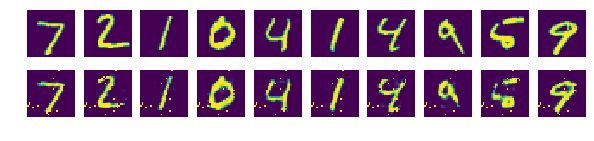

In [15]:
# 결괏값을 정확도가 아닌, 디코더로 생성해낸 결과를 직관적인 방법으로 확인
# 여기서는 간단하게 matplotlib를 이용해 이미지로 출력

# 먼저 총 10개의 테스트 데이터를 가져와 디코더를 이용해 출력값으로 만듭니다.
sample_size = 10

samples = sess.run(decoder,
                   feed_dict={X: mnist.test.images[:sample_size]})

# 그런 다음 numpy 모듈을 이용해 MNIST 데이터를 28 X 28 크기의 이미지 데이터로 재구성한 뒤,
# matplotlib의 imshow 함수를 이용해 그래프에 이미지로 출력
# 위쪽에는 입력값의 이미지
# 아래쪽에는 신경망으로 생성한 이미지를 출력

fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
  ax[0][i].set_axis_off()
  ax[1][i].set_axis_off()
  ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
  ax[1][i].imshow(np.reshape(samples[i], (28, 28)))
  
plt.show()